<a href="https://colab.research.google.com/github/sjsoumil/Projects/blob/main/Sales_EDA_Soumil_Jain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# First we will do data preprocessing that means
#1 datacleaning- removing unnecessay rows and columns
#2 Handling Missing data
#After the above steps we can start our EDA

In [7]:
df=pd.read_csv("data_EDA.csv")
df.head()

,rownames,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Kennedy,Europe,political.knowledge,gender
0,1,Liberal Democrat,43,3,3,4,1,4,2,2,female
1,2,Labour,36,4,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,3,2,male
3,4,Labour,24,4,2,2,1,3,4,0,female
4,5,Labour,41,2,2,1,1,4,6,2,male


In [8]:
df.drop("rownames",axis=1,inplace=True) # We dropped the column rownames cuz it is of no use in analysis

In [ ]:
df.isna().sum() #checking if there is any null values in dataset

In [ ]:
df.info() # Gives info about columns and their Datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Kennedy                  1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [ ]:
df.shape #To get the Dimensions of the dataset

(1525, 10)

In [ ]:
df.describe() # we got some statistical values of the numeric columns

,age,economic.cond.national,economic.cond.household,Blair,Hague,Kennedy,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,3.135082,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,1.081997,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,3.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [ ]:
# from describe we can see here are some NAN value might be the reason there is difference in the way the dataset is read
print(df.dtypes)


vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Kennedy                     int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object


In [9]:
# here vote and gender should be considered as categorical values
df["vote"] = df["vote"].astype("category")
df["gender"]=df["gender"].astype("category")
print(df.dtypes)

vote                       category
age                           int64
economic.cond.national        int64
economic.cond.household       int64
Blair                         int64
Hague                         int64
Kennedy                       int64
Europe                        int64
political.knowledge           int64
gender                     category
dtype: object


In [ ]:
# now we have to make sure there are no duplicate values
df.drop_duplicates(inplace=True)  #Inplace make sures that changes are made in the dataset df we are using
df.shape # Since the shape is same as before there were no duplicate values

(1525, 10)

In [ ]:
df[df["age"]<18] #Making sure that there is no voters below the age of 18

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Kennedy,Europe,political.knowledge,gender


<ipython-input-67-459fa8a5049e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='coolwarm')


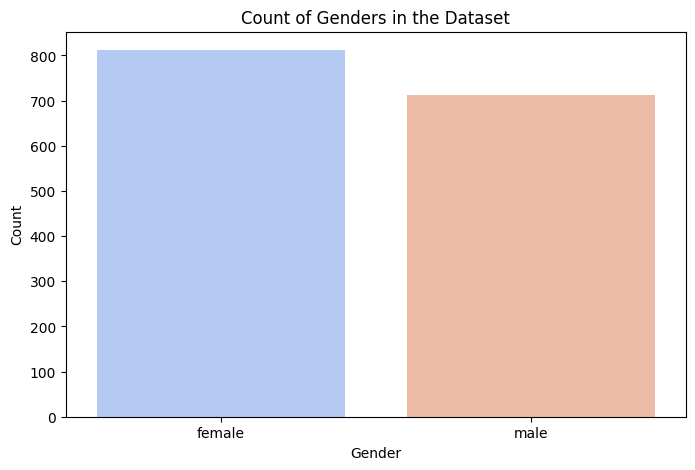

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df, palette='coolwarm')
plt.title('Count of Genders in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


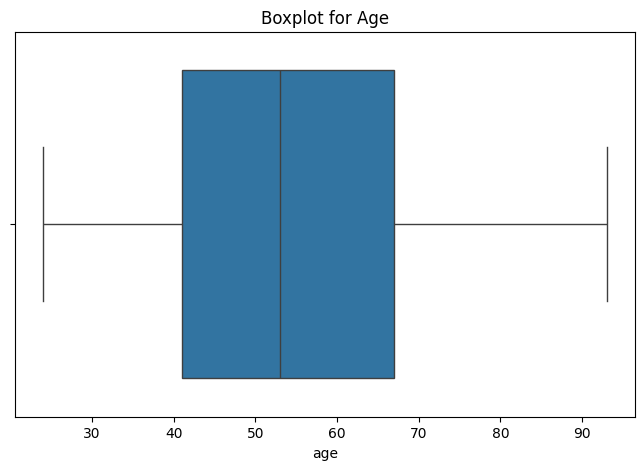

In [11]:
# Boxplot to visualize outliers in age
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age'])
plt.title('Boxplot for Age')
plt.show()

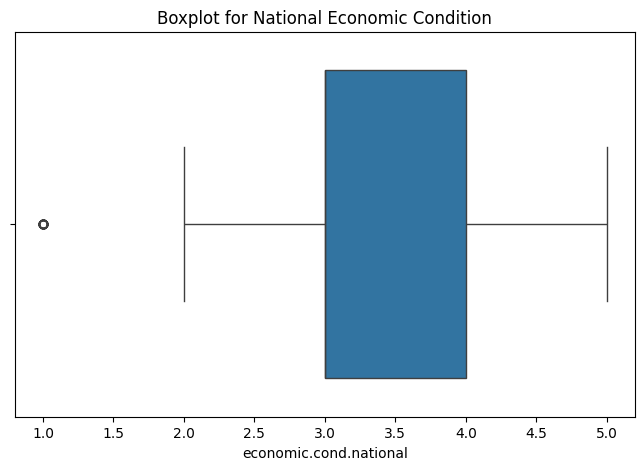

In [12]:
# Boxplot to visualize outliers in national economic condition
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['economic.cond.national'])
plt.title('Boxplot for National Economic Condition')
plt.show()

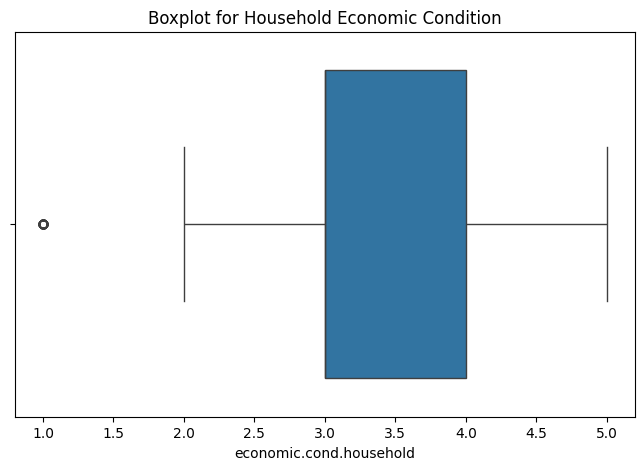

In [13]:
# Boxplot to visualize outliers in household economic condition
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['economic.cond.household'])
plt.title('Boxplot for Household Economic Condition')
plt.show()

In [14]:
from scipy import stats

# Z-score calculation for continuous variables
z_scores = np.abs(stats.zscore(df[['age', 'economic.cond.national', 'economic.cond.household']]))
print(z_scores)

# Define threshold for outliers (commonly 3)
threshold = 3

# Identify outliers based on Z-score
outliers_zscore = np.where(z_scores > threshold)
print(f"Outliers detected at positions (row, column): {outliers_zscore}")


           age  economic.cond.national  economic.cond.household
0     0.711973                0.279218                 0.150948
1     1.157661                0.856268                 0.924730
2     1.221331                0.856268                 0.924730
3     1.921698                0.856268                 1.226625
4     0.839313                1.414704                 1.226625
...        ...                     ...                      ...
1520  0.816100                1.991754                 0.150948
1521  1.198118                1.414704                 1.226625
1522  1.093992                0.279218                 0.150948
1523  0.434081                0.279218                 0.150948
1524  1.261787                1.414704                 0.150948

[1525 rows x 3 columns]
Outliers detected at positions (row, column): (array([], dtype=int64), array([], dtype=int64))


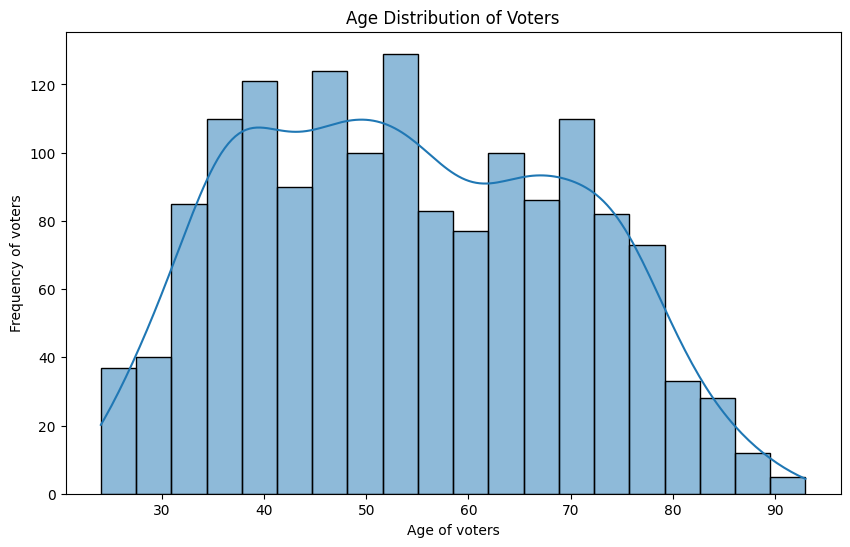

In [ ]:
#Univariate Analysis - In this we will consider only one variable for analysis

#1 Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(df["age"],kde=True,bins=20)
plt.title("Age Distribution of Voters")
plt.xlabel("Age of voters")
plt.ylabel("Frequency of voters")
plt.show()



In [15]:
# IQR method for outlier detection in 'age' column
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_IQR_age = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print("Outliers in 'age' using IQR method:")
print(outliers_IQR_age)

# Same can be done for other columns like 'economic.cond.national' and 'economic.cond.household'
Q1_nat = df['economic.cond.national'].quantile(0.25)
Q3_nat = df['economic.cond.national'].quantile(0.75)
IQR_nat = Q3_nat - Q1_nat

lower_bound_nat = Q1_nat - 1.5 * IQR_nat
upper_bound_nat = Q3_nat + 1.5 * IQR_nat

outliers_IQR_nat = df[(df['economic.cond.national'] < lower_bound_nat) | (df['economic.cond.national'] > upper_bound_nat)]
print("Outliers in 'economic.cond.national' using IQR method:")
print(outliers_IQR_nat)


Outliers in 'age' using IQR method:
Empty DataFrame
Columns: [vote, age, economic.cond.national, economic.cond.household, Blair, Hague, Kennedy, Europe, political.knowledge, gender]
Index: []
Outliers in 'economic.cond.national' using IQR method:
                  vote  age  economic.cond.national  economic.cond.household  \
39        Conservative   72                       1                        3   
42              Labour   66                       1                        1   
57              Labour   32                       1                        2   
91        Conservative   49                       1                        1   
105             Labour   60                       1                        3   
109             Labour   31                       1                        1   
159             Labour   67                       1                        3   
165       Conservative   53                       1                        3   
215       Conservative   34      

In [16]:
# Removing outliers using IQR for 'age'
df_no_outliers_age = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Removing outliers using IQR for 'economic.cond.national'
df_no_outliers_nat = df_no_outliers_age[(df_no_outliers_age['economic.cond.national'] >= lower_bound_nat) &
                                        (df_no_outliers_age['economic.cond.national'] <= upper_bound_nat)]

print(f"Dataset shape after removing outliers: {df_no_outliers_nat.shape}")


Dataset shape after removing outliers: (1488, 10)


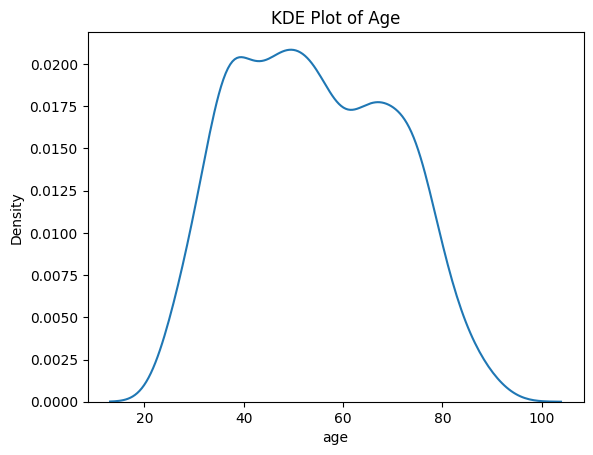

In [ ]:
# KDE Plot
sns.kdeplot(df["age"])
plt.title('KDE Plot of Age')
plt.show()

Text(0, 0.5, 'Frequency of voters')

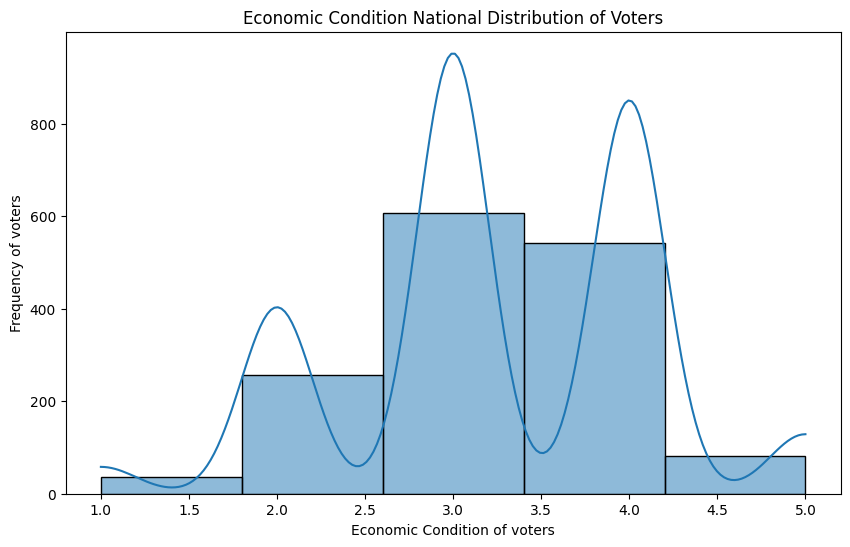

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df["economic.cond.national"],kde=True,bins=5)
plt.title("Economic Condition National Distribution of Voters")
plt.xlabel("Economic Condition of voters")
plt.ylabel("Frequency of voters")

Text(0, 0.5, 'Frequency of voters')

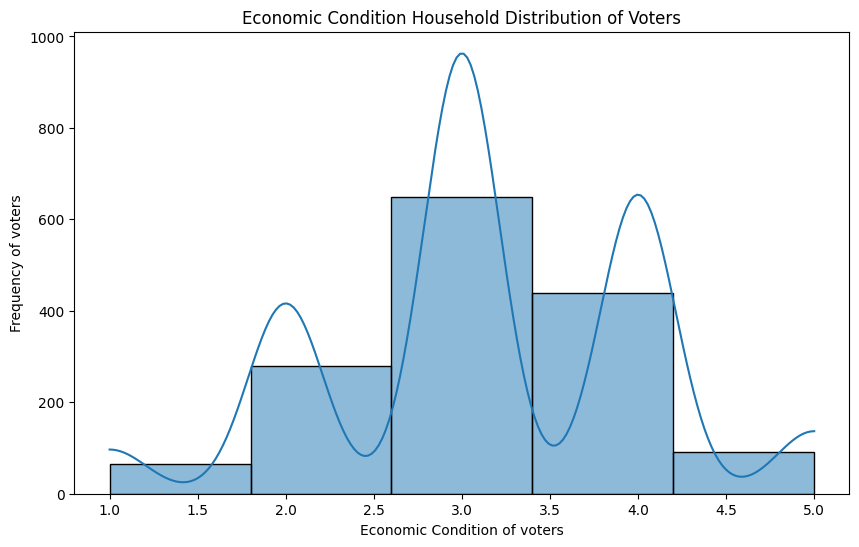

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df["economic.cond.household"],kde=True,bins=5)
plt.title("Economic Condition Household Distribution of Voters")
plt.xlabel("Economic Condition of voters")
plt.ylabel("Frequency of voters")

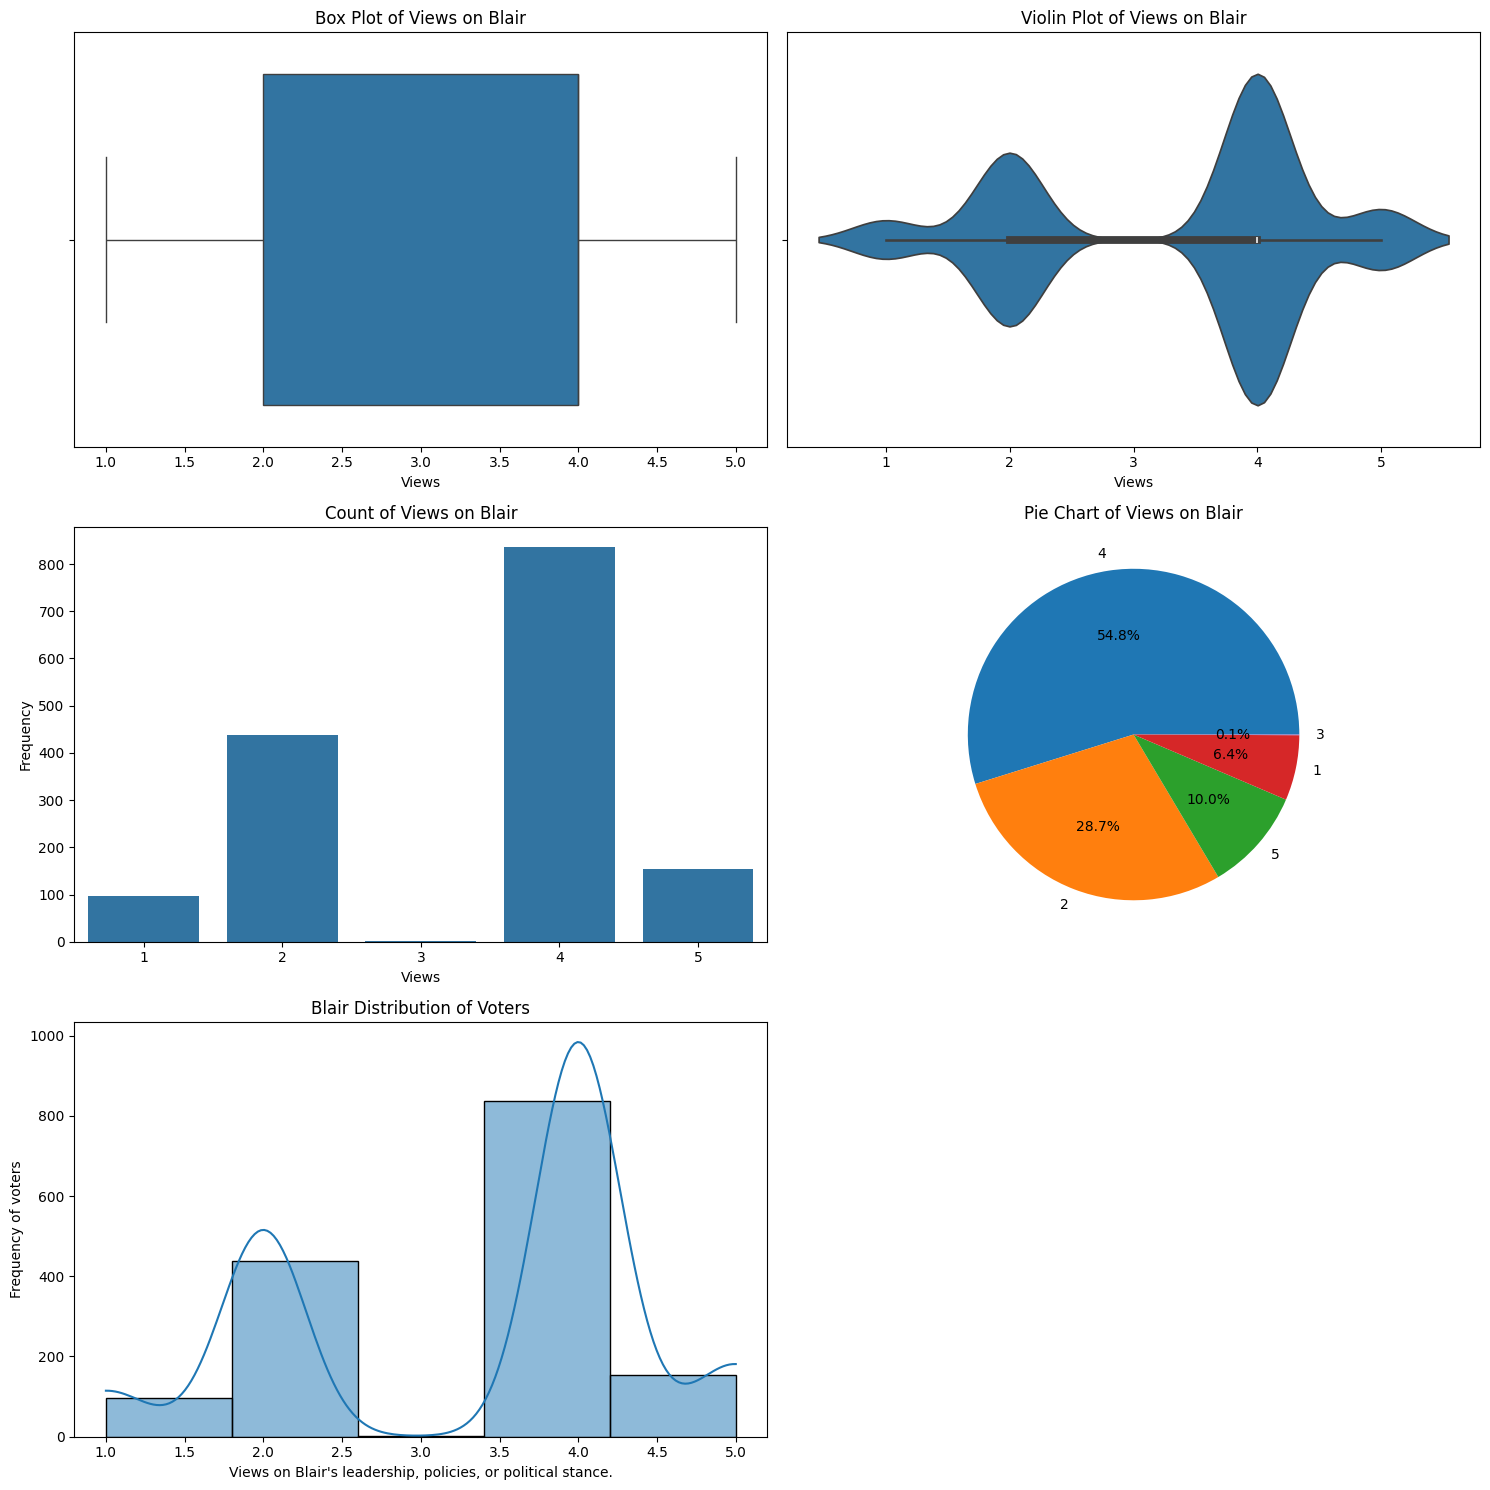

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows, 2 columns

# Box Plot for Blair
sns.boxplot(x=df['Blair'], ax=axs[0, 0])
axs[0, 0].set_title("Box Plot of Views on Blair")
axs[0, 0].set_xlabel("Views")

# Violin Plot for Blair
sns.violinplot(x=df['Blair'], ax=axs[0, 1])
axs[0, 1].set_title("Violin Plot of Views on Blair")
axs[0, 1].set_xlabel("Views")

# Count Plot for Blair
sns.countplot(x='Blair', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Count of Views on Blair")
axs[1, 0].set_xlabel("Views")
axs[1, 0].set_ylabel("Frequency")

# Pie Chart for Blair
df['Blair'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1, 1], legend=False)
axs[1, 1].set_title("Pie Chart of Views on Blair")
axs[1, 1].set_ylabel("")  # Remove y-label for clarity

# Histogram with KDE for Blair
sns.histplot(df["Blair"], kde=True, bins=5, ax=axs[2, 0])
axs[2, 0].set_title("Blair Distribution of Voters")
axs[2, 0].set_xlabel("Views on Blair's leadership, policies, or political stance.")
axs[2, 0].set_ylabel("Frequency of voters")

# Hide empty subplot (if any)
axs[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

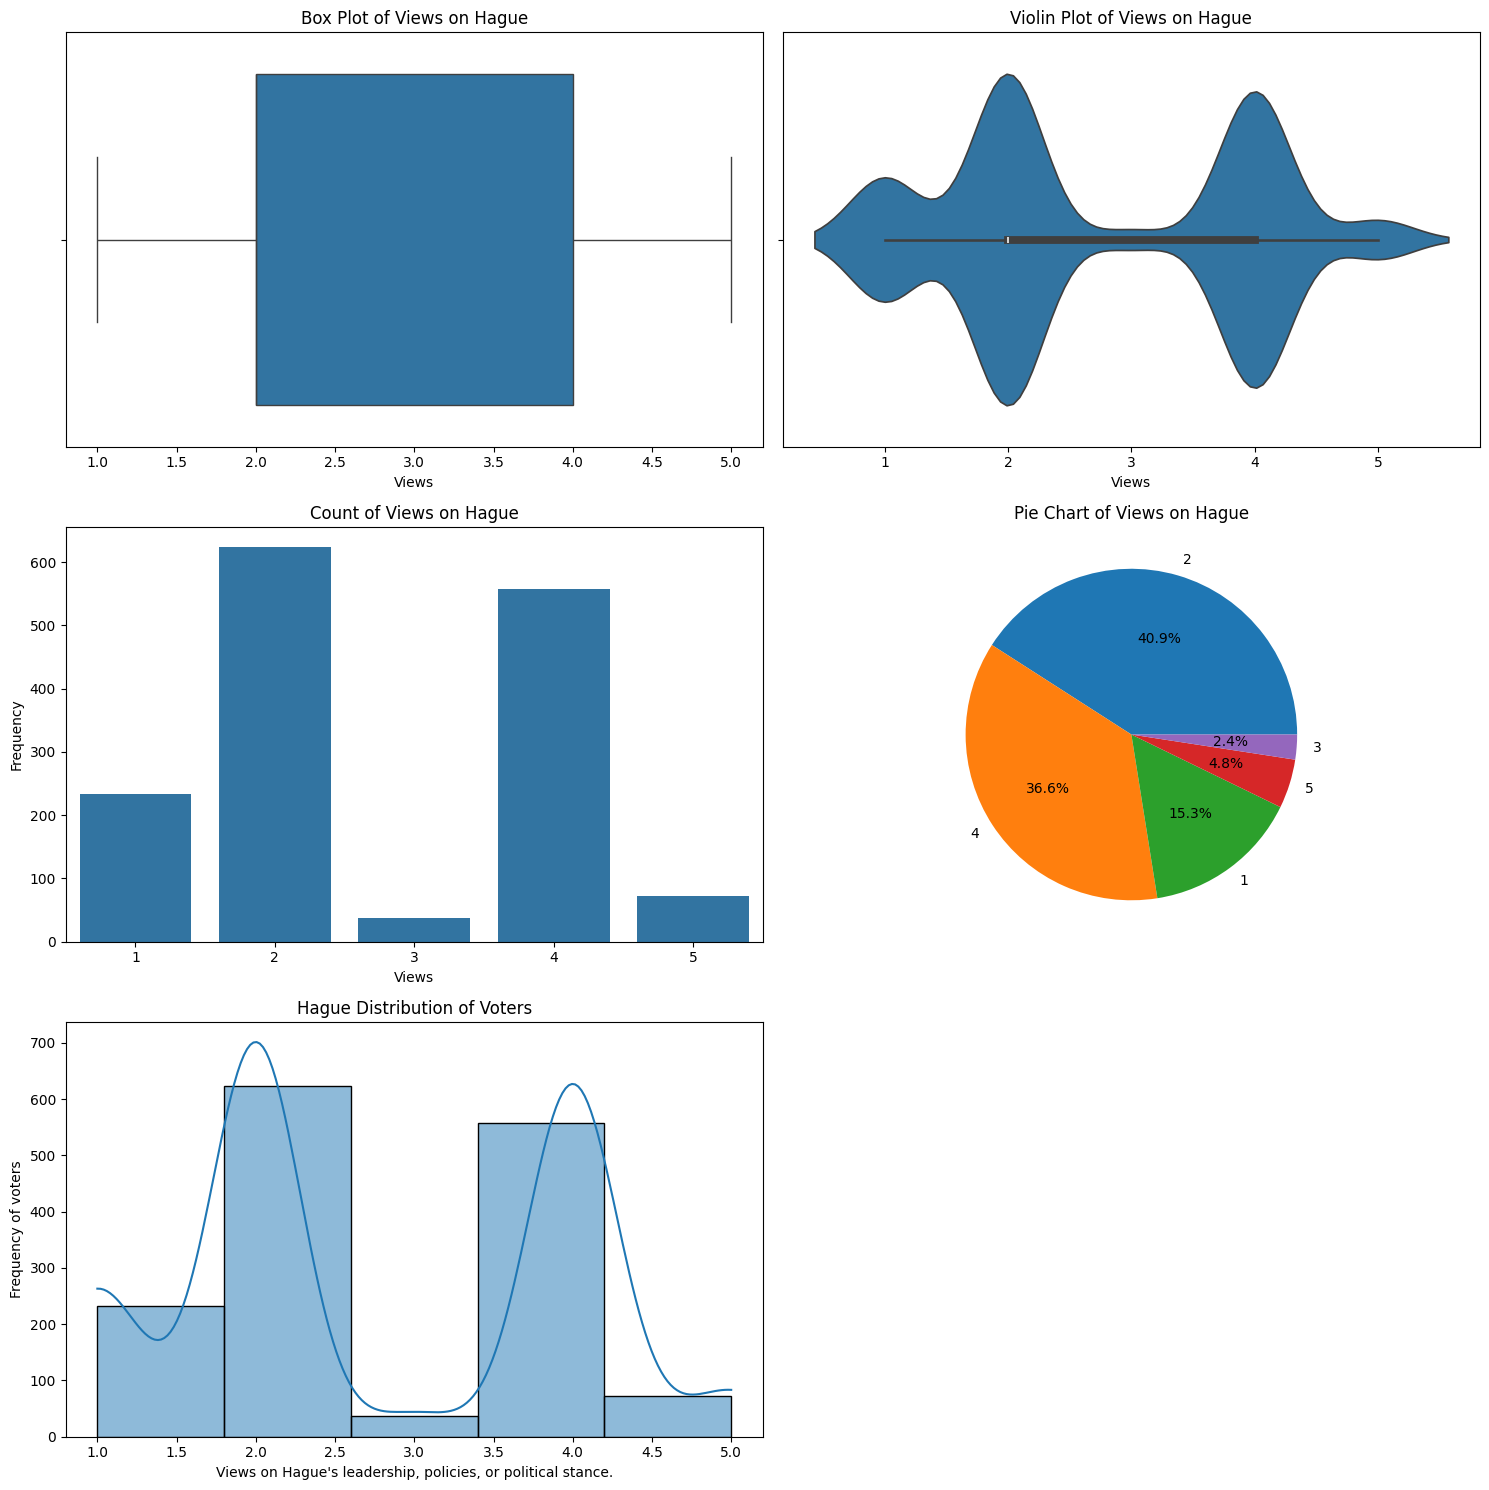

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows, 2 columns

# Box Plot
sns.boxplot(x=df['Hague'], ax=axs[0, 0])
axs[0, 0].set_title("Box Plot of Views on Hague")
axs[0, 0].set_xlabel("Views")

# Violin Plot
sns.violinplot(x=df['Hague'], ax=axs[0, 1])
axs[0, 1].set_title("Violin Plot of Views on Hague")
axs[0, 1].set_xlabel("Views")

# Count Plot
sns.countplot(x='Hague', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Count of Views on Hague")
axs[1, 0].set_xlabel("Views")
axs[1, 0].set_ylabel("Frequency")

# Pie Chart
df['Hague'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1, 1], legend=False)
axs[1, 1].set_title("Pie Chart of Views on Hague")
axs[1, 1].set_ylabel("")  # Remove y-label for clarity

# Histogram with KDE
sns.histplot(df["Hague"], kde=True, bins=5, ax=axs[2, 0])
axs[2, 0].set_title("Hague Distribution of Voters")
axs[2, 0].set_xlabel("Views on Hague's leadership, policies, or political stance.")
axs[2, 0].set_ylabel("Frequency of voters")

# Hide empty subplot (if any)
axs[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

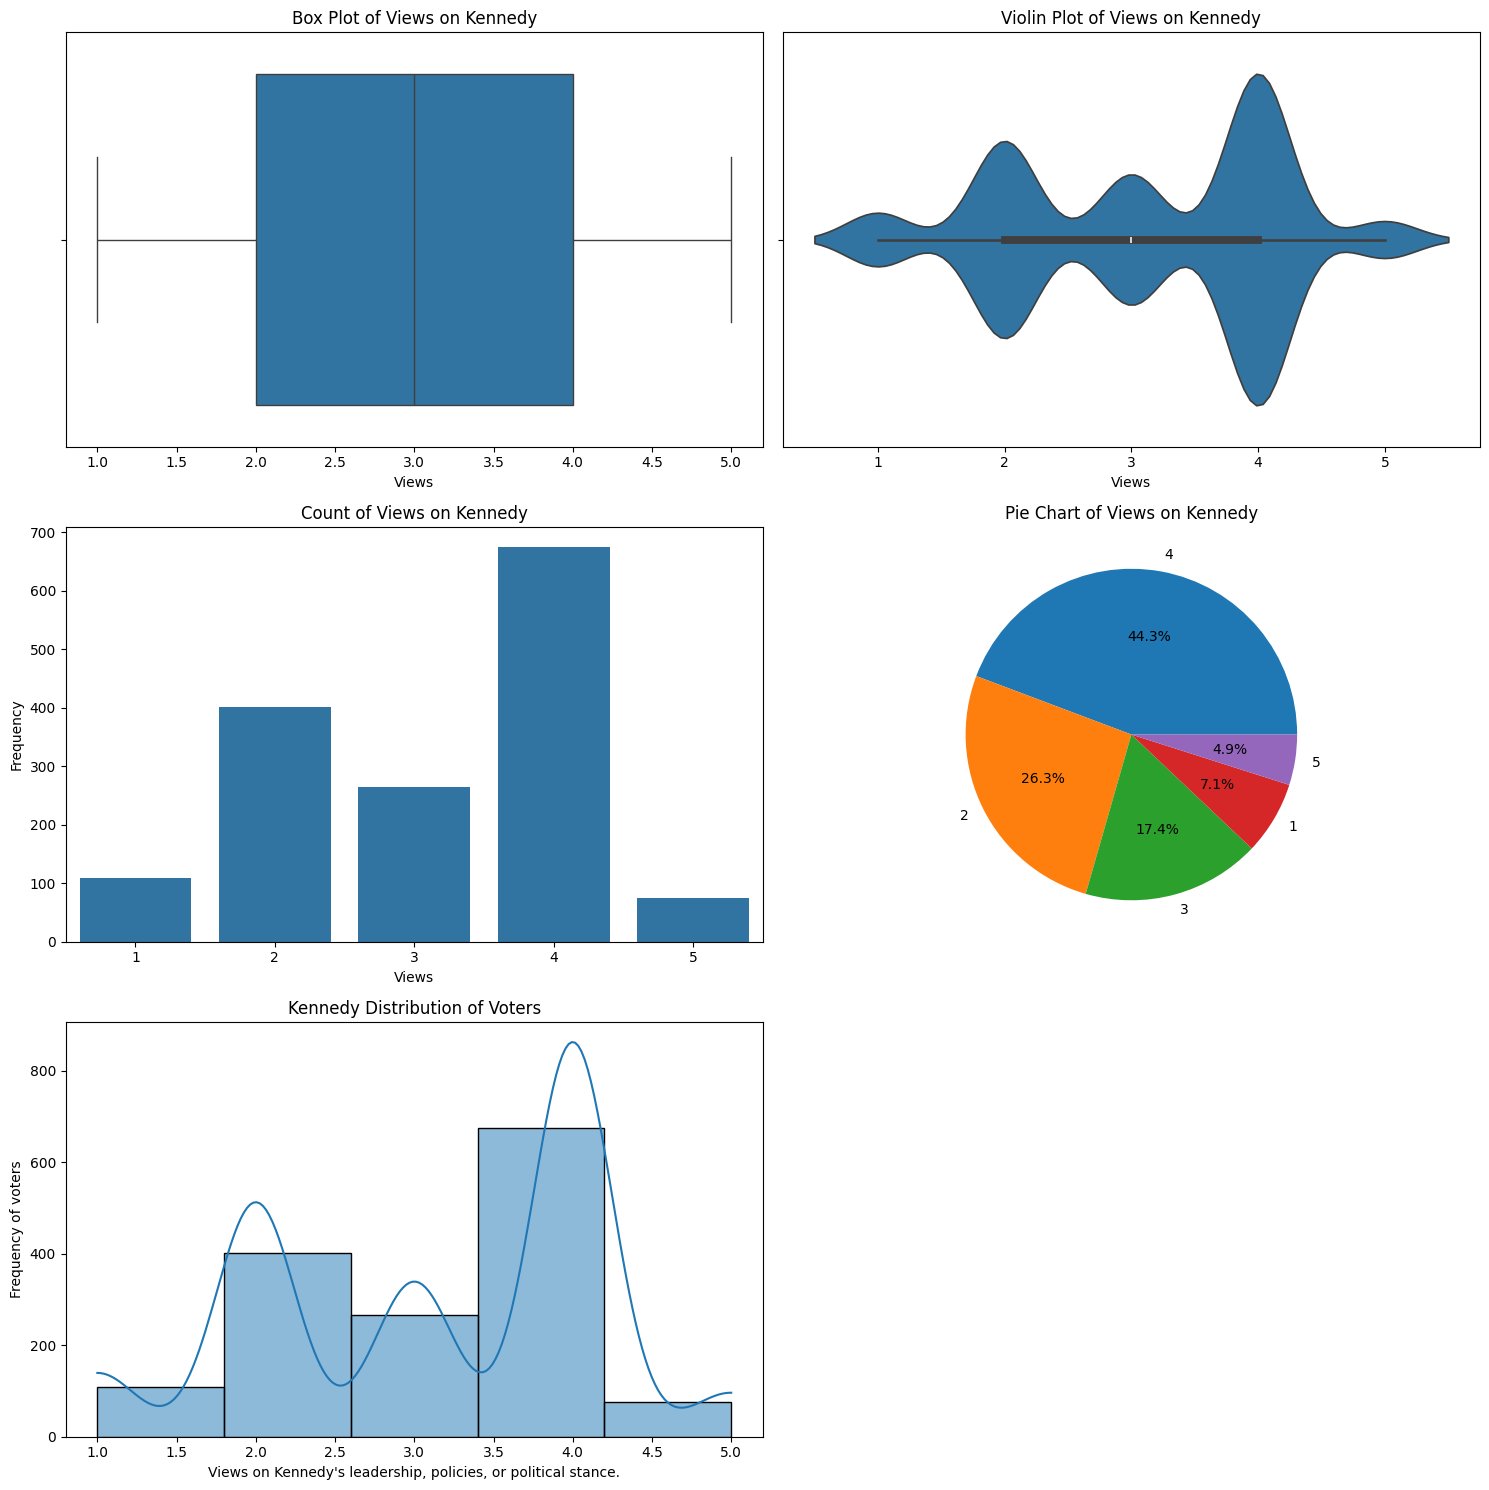

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows, 2 columns

# Box Plot for Kennedy
sns.boxplot(x=df['Kennedy'], ax=axs[0, 0])
axs[0, 0].set_title("Box Plot of Views on Kennedy")
axs[0, 0].set_xlabel("Views")

# Violin Plot for Kennedy
sns.violinplot(x=df['Kennedy'], ax=axs[0, 1])
axs[0, 1].set_title("Violin Plot of Views on Kennedy")
axs[0, 1].set_xlabel("Views")

# Count Plot for Kennedy
sns.countplot(x='Kennedy', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Count of Views on Kennedy")
axs[1, 0].set_xlabel("Views")
axs[1, 0].set_ylabel("Frequency")

# Pie Chart for Kennedy
df['Kennedy'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1, 1], legend=False)
axs[1, 1].set_title("Pie Chart of Views on Kennedy")
axs[1, 1].set_ylabel("")  # Remove y-label for clarity

# Histogram with KDE for Kennedy
sns.histplot(df["Kennedy"], kde=True, bins=5, ax=axs[2, 0])
axs[2, 0].set_title("Kennedy Distribution of Voters")
axs[2, 0].set_xlabel("Views on Kennedy's leadership, policies, or political stance.")
axs[2, 0].set_ylabel("Frequency of voters")

# Hide the empty subplot (last one)
axs[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

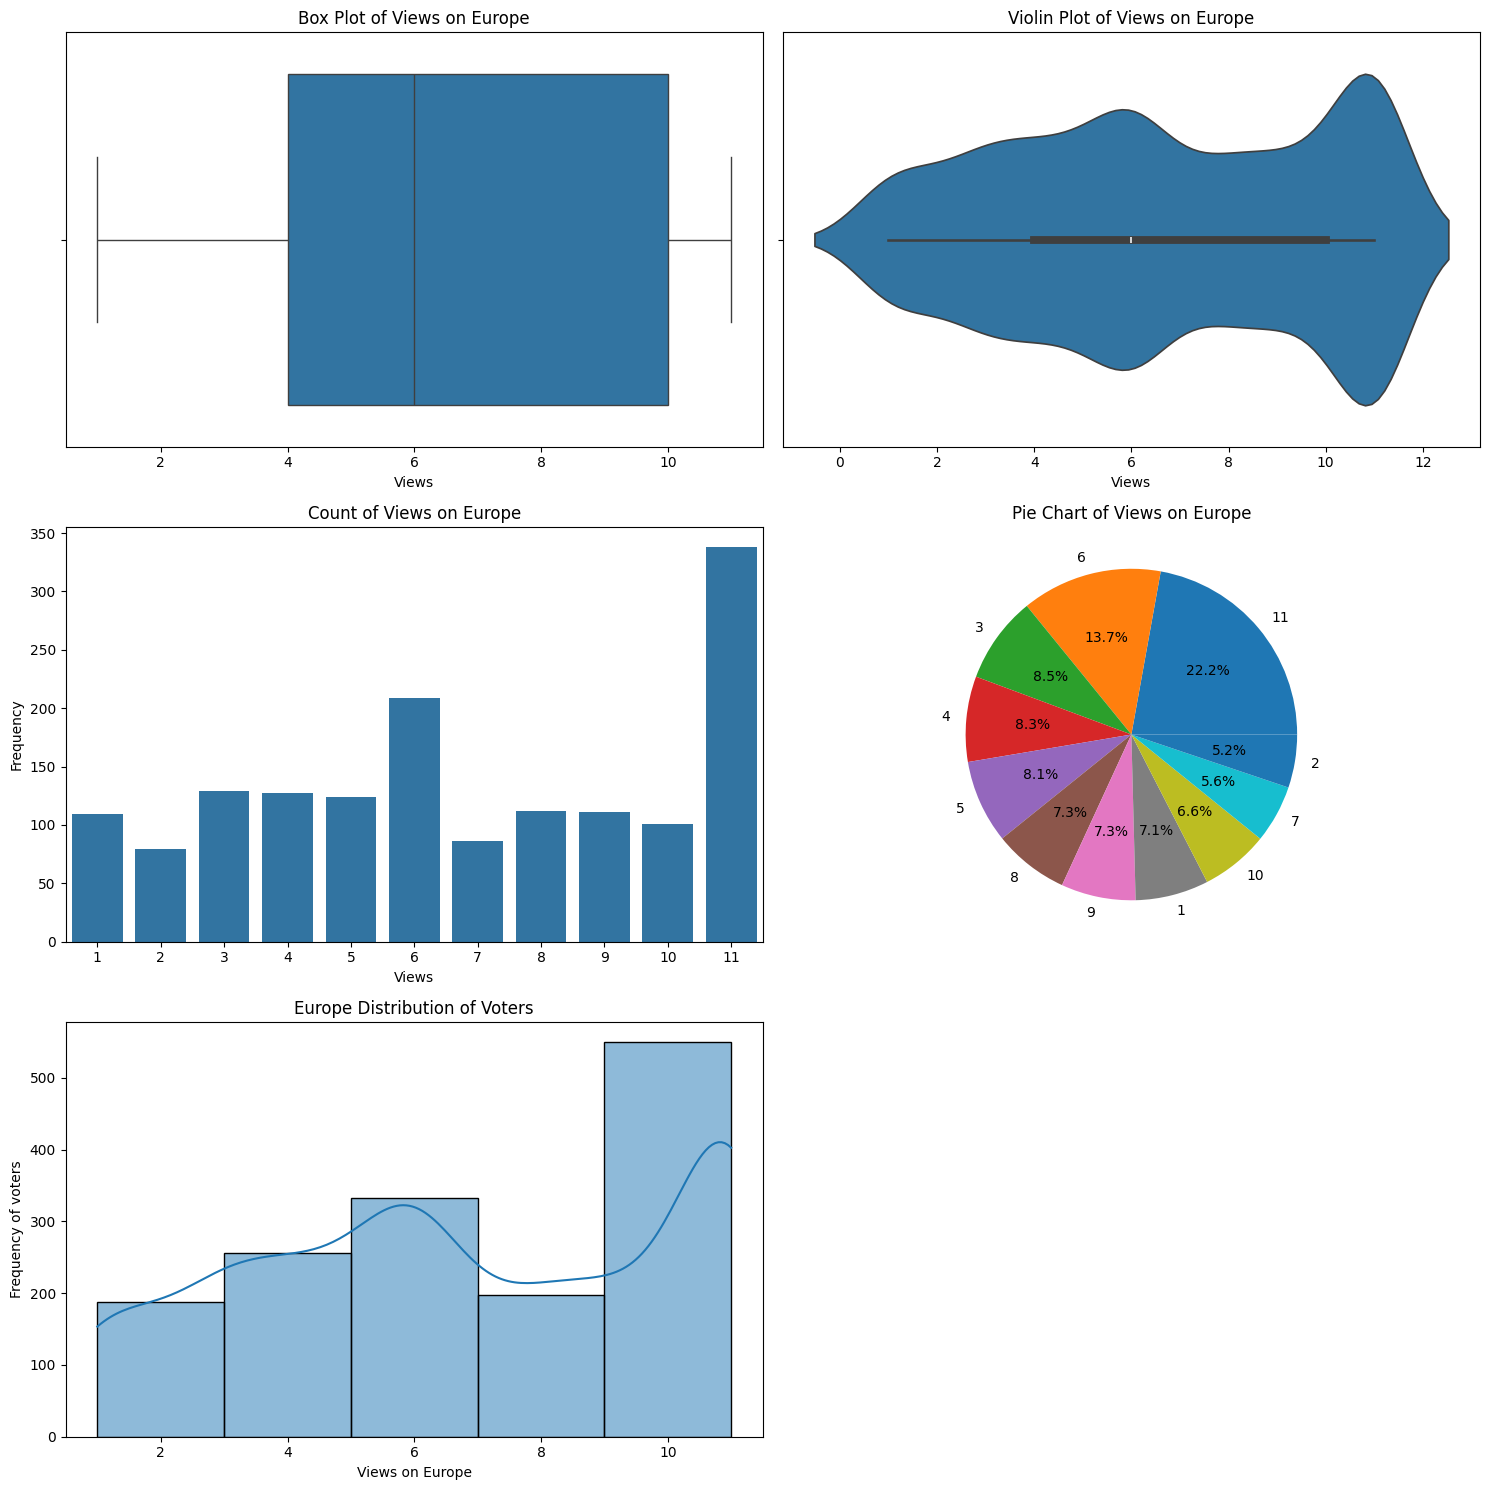

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows, 2 columns

# Box Plot for Europe
sns.boxplot(x=df['Europe'], ax=axs[0, 0])
axs[0, 0].set_title("Box Plot of Views on Europe")
axs[0, 0].set_xlabel("Views")

# Violin Plot for Europe
sns.violinplot(x=df['Europe'], ax=axs[0, 1])
axs[0, 1].set_title("Violin Plot of Views on Europe")
axs[0, 1].set_xlabel("Views")

# Count Plot for Europe
sns.countplot(x='Europe', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Count of Views on Europe")
axs[1, 0].set_xlabel("Views")
axs[1, 0].set_ylabel("Frequency")

# Pie Chart for Europe
df['Europe'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1, 1], legend=False)
axs[1, 1].set_title("Pie Chart of Views on Europe")
axs[1, 1].set_ylabel("")  # Remove y-label for clarity

# Histogram with KDE for Europe
sns.histplot(df["Europe"], kde=True, bins=5, ax=axs[2, 0])
axs[2, 0].set_title("Europe Distribution of Voters")
axs[2, 0].set_xlabel("Views on Europe")
axs[2, 0].set_ylabel("Frequency of voters")

# Hide the empty subplot (if any)
axs[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

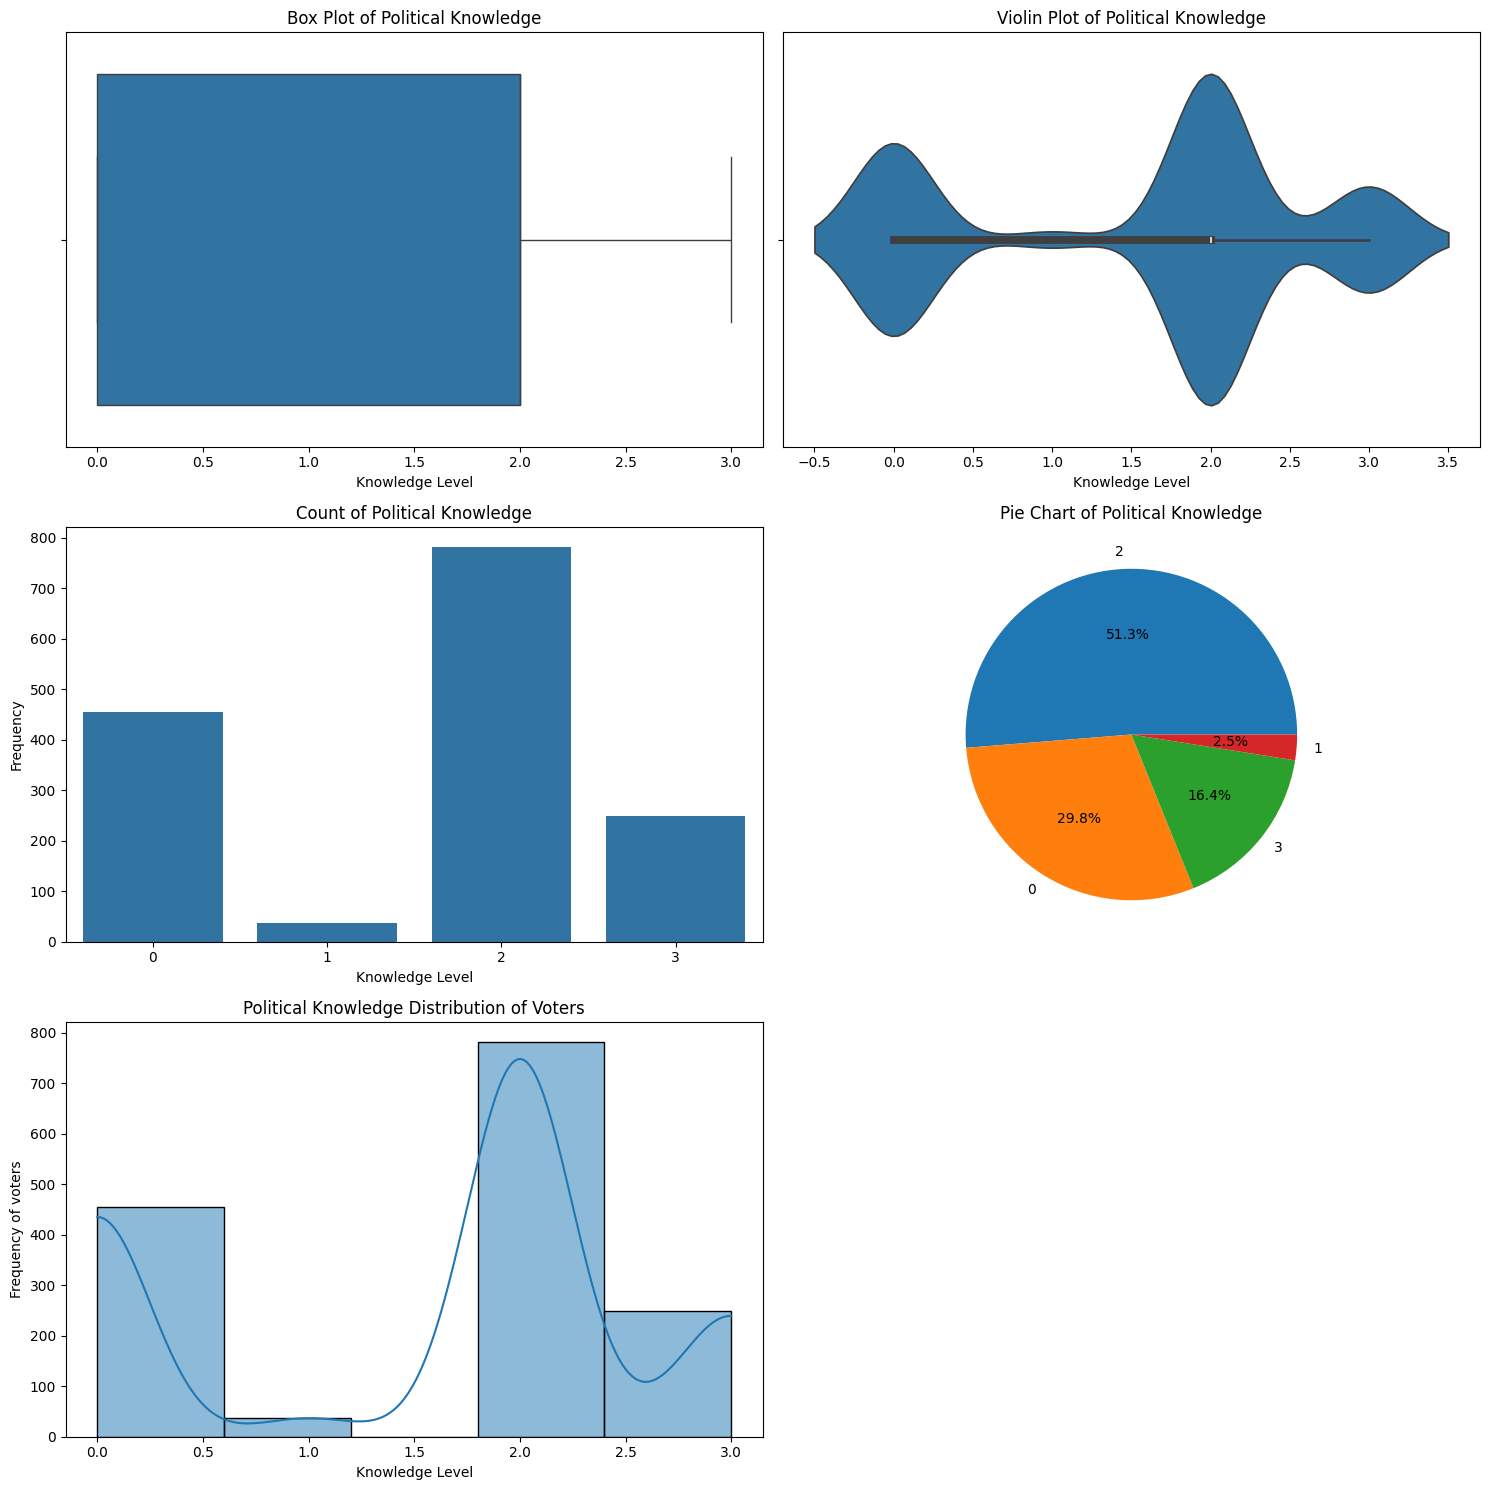

In [ ]:
# Create a figure with subplots for Political Knowledge
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows, 2 columns

# Box Plot for Political Knowledge
sns.boxplot(x=df['political.knowledge'], ax=axs[0, 0])
axs[0, 0].set_title("Box Plot of Political Knowledge")
axs[0, 0].set_xlabel("Knowledge Level")

# Violin Plot for Political Knowledge
sns.violinplot(x=df['political.knowledge'], ax=axs[0, 1])
axs[0, 1].set_title("Violin Plot of Political Knowledge")
axs[0, 1].set_xlabel("Knowledge Level")

# Count Plot for Political Knowledge
sns.countplot(x='political.knowledge', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Count of Political Knowledge")
axs[1, 0].set_xlabel("Knowledge Level")
axs[1, 0].set_ylabel("Frequency")

# Pie Chart for Political Knowledge
df['political.knowledge'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1, 1], legend=False)
axs[1, 1].set_title("Pie Chart of Political Knowledge")
axs[1, 1].set_ylabel("")  # Remove y-label for clarity

# Histogram with KDE for Political Knowledge
sns.histplot(df["political.knowledge"], kde=True, bins=5, ax=axs[2, 0])
axs[2, 0].set_title("Political Knowledge Distribution of Voters")
axs[2, 0].set_xlabel("Knowledge Level")
axs[2, 0].set_ylabel("Frequency of voters")

# Hide the empty subplot (if any)
axs[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


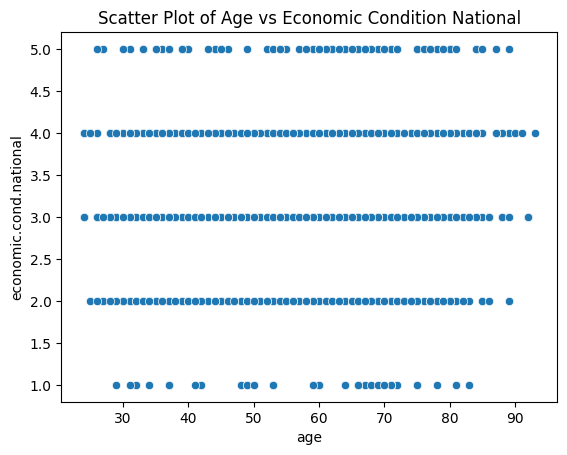

In [ ]:
# Bivariate Analysis
sns.scatterplot(x='age', y='economic.cond.national', data=df)
plt.title('Scatter Plot of Age vs Economic Condition National')
plt.show()


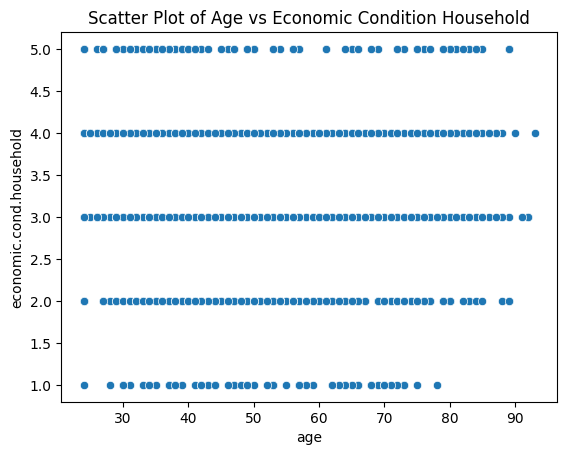

In [ ]:
sns.scatterplot(x='age', y='economic.cond.household', data=df)
plt.title('Scatter Plot of Age vs Economic Condition Household')
plt.show()

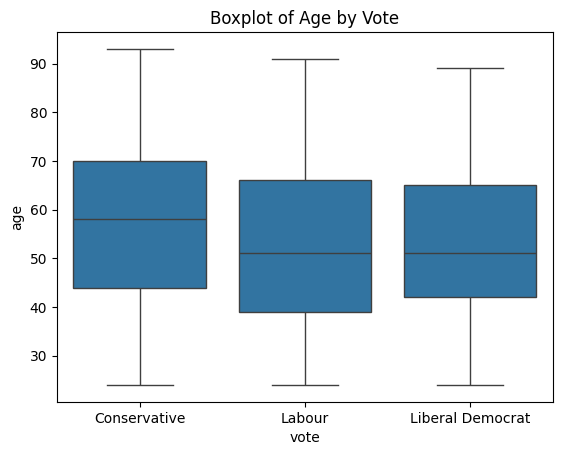

In [ ]:
sns.boxplot(x='vote', y='age', data=df) #boxplot
plt.title('Boxplot of Age by Vote')
plt.show()


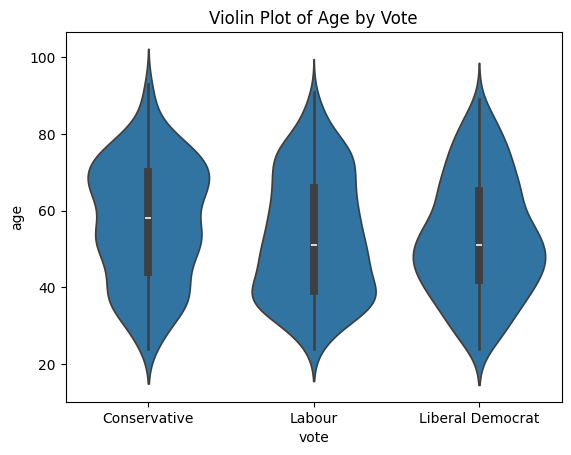

In [ ]:
sns.violinplot(x='vote', y='age', data=df) #violinplot
plt.title('Violin Plot of Age by Vote')
plt.show()


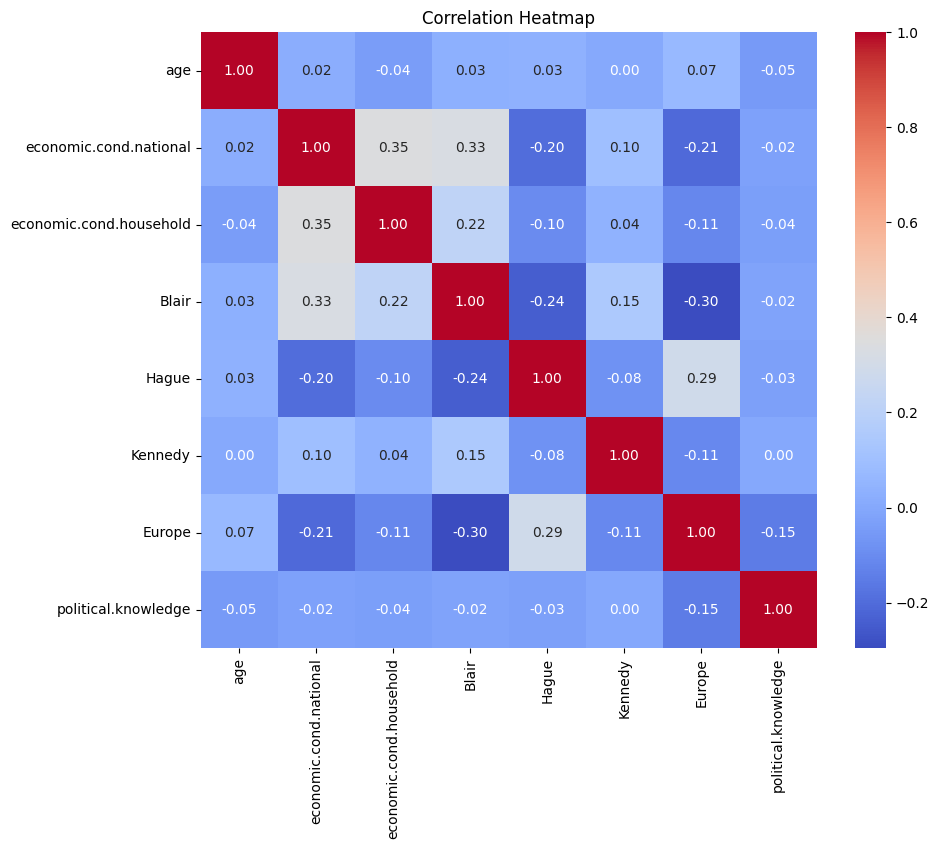

In [ ]:
plt.figure(figsize=(10, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


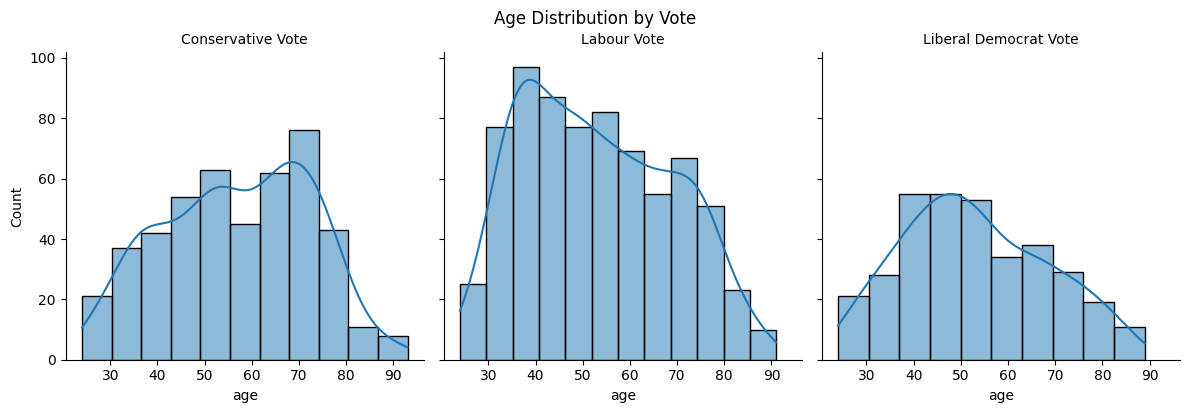

In [ ]:
g = sns.FacetGrid(df, col='vote', col_wrap=3, height=4)
g.map(sns.histplot, 'age', kde=True)
g.set_titles(col_template='{col_name} Vote')
plt.suptitle('Age Distribution by Vote', y=1.02)
plt.show()


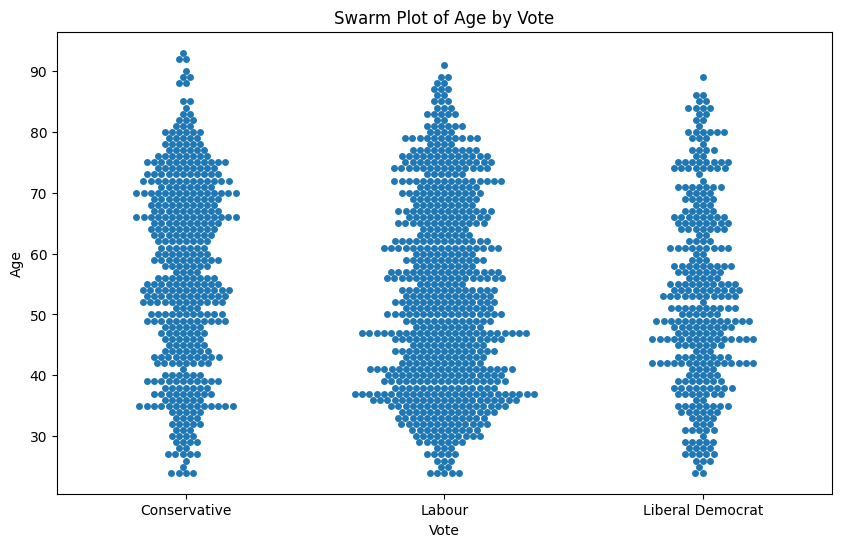

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='vote', y='age', data=df)
plt.title('Swarm Plot of Age by Vote')
plt.ylabel('Age')
plt.xlabel('Vote')
plt.show()


<ipython-input-64-4dbd6f3c89ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vote', data=df, palette='Set2')


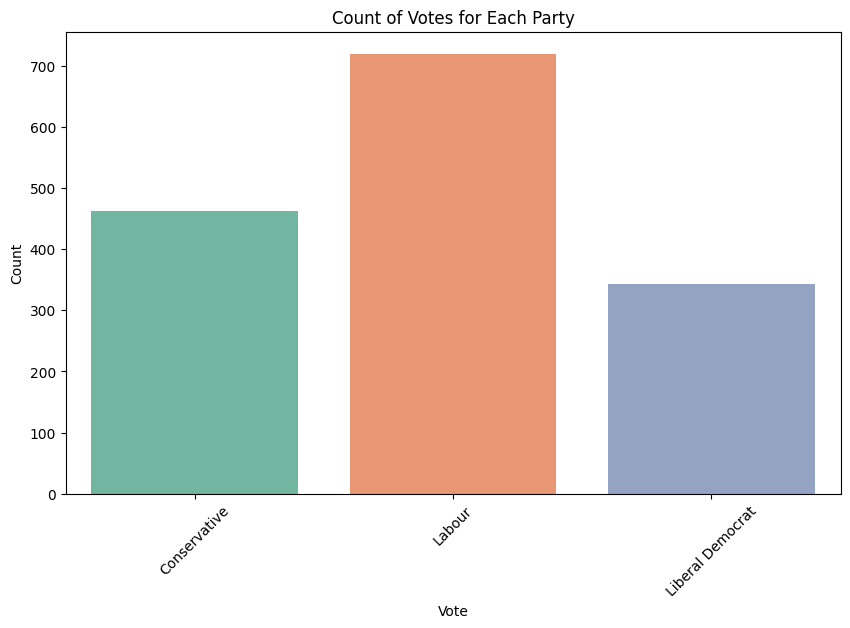

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='vote', data=df, palette='Set2')
plt.title('Count of Votes for Each Party')
plt.xlabel('Vote')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


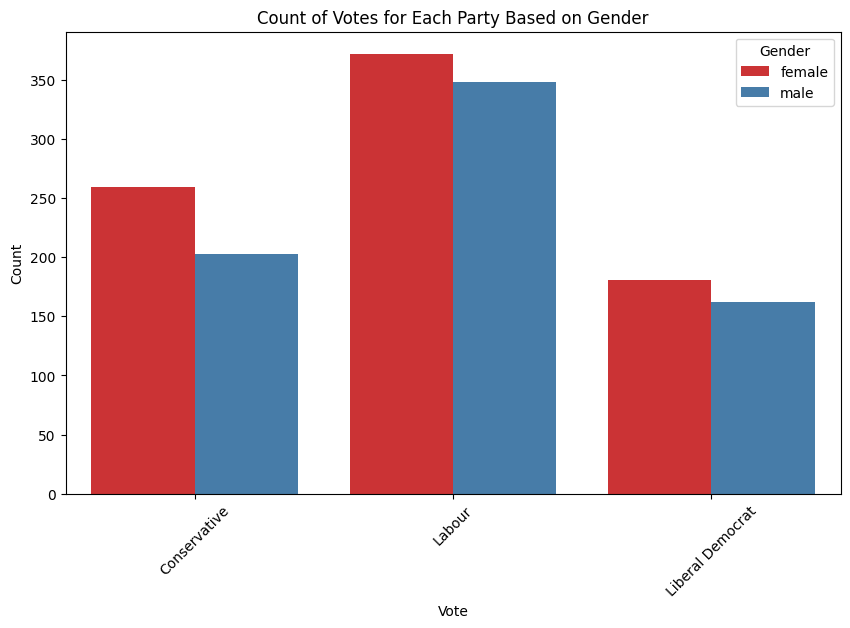

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='vote', hue='gender', data=df, palette='Set1')
plt.title('Count of Votes for Each Party Based on Gender')
plt.xlabel('Vote')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.legend(title='Gender')
plt.show()


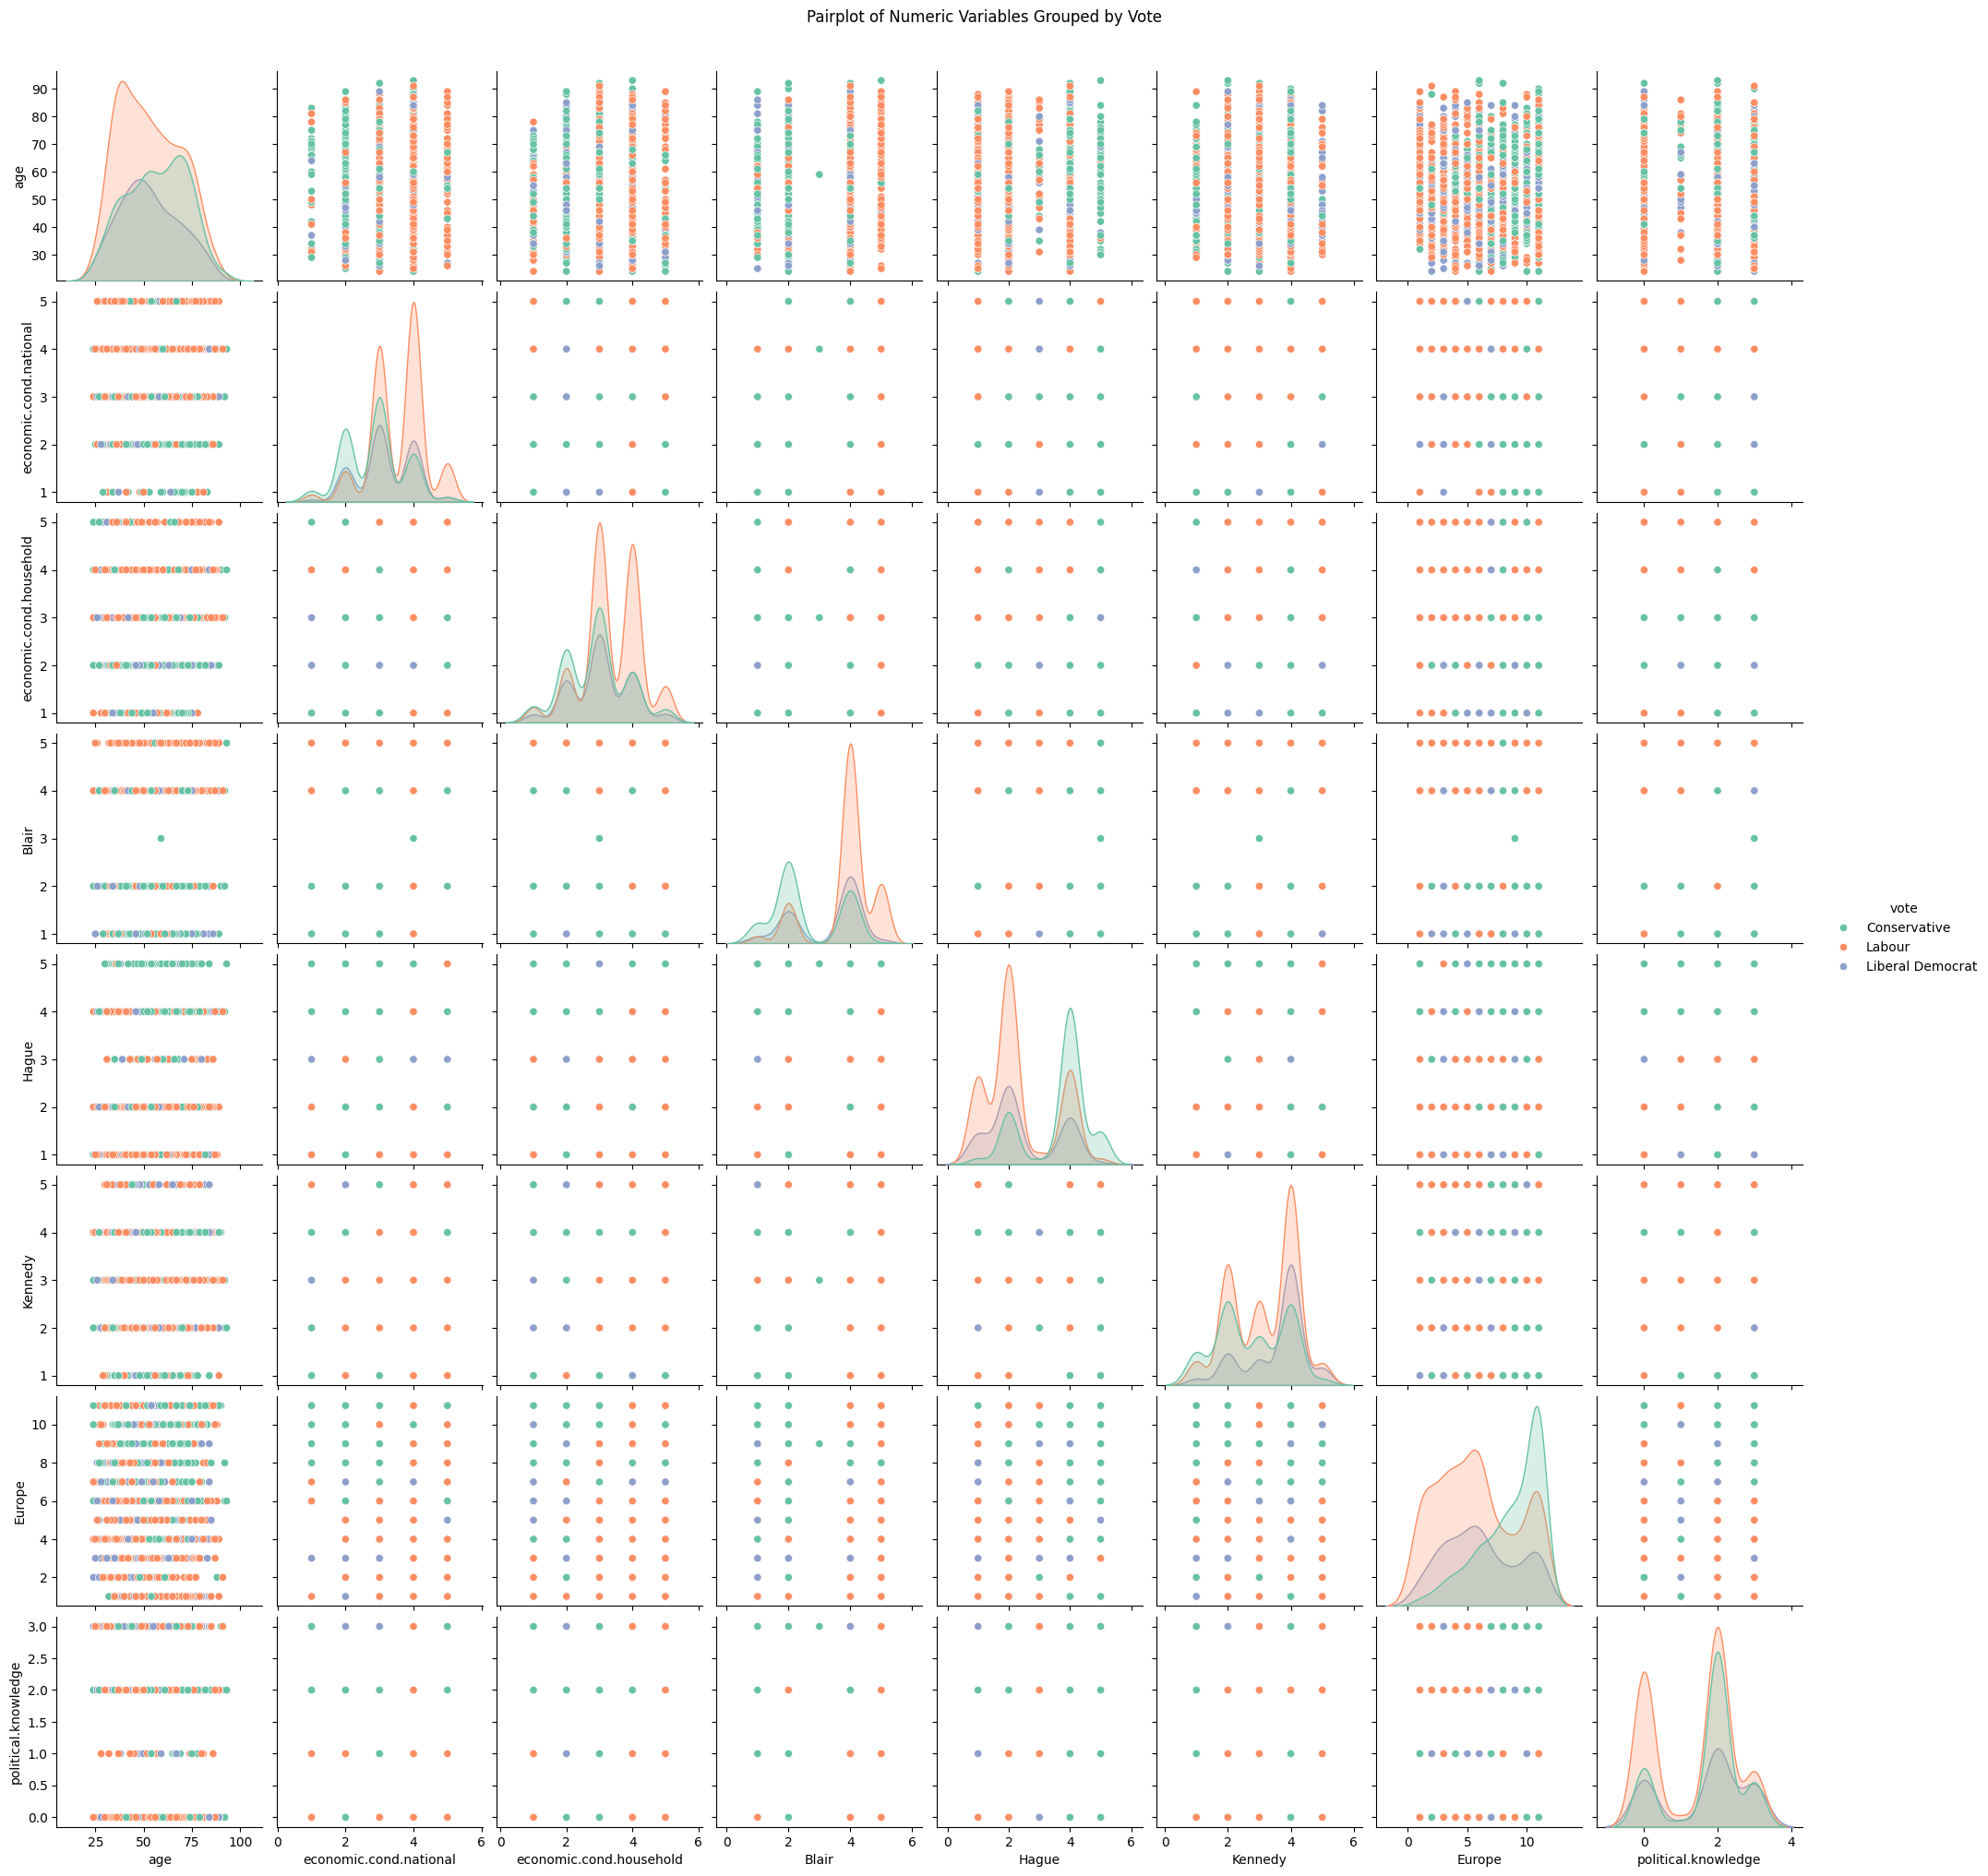

In [ ]:
# Pairplot of multiple variables, colored by 'vote'
sns.pairplot(df, hue='vote', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot of Numeric Variables Grouped by Vote', y=1.02)
plt.show()


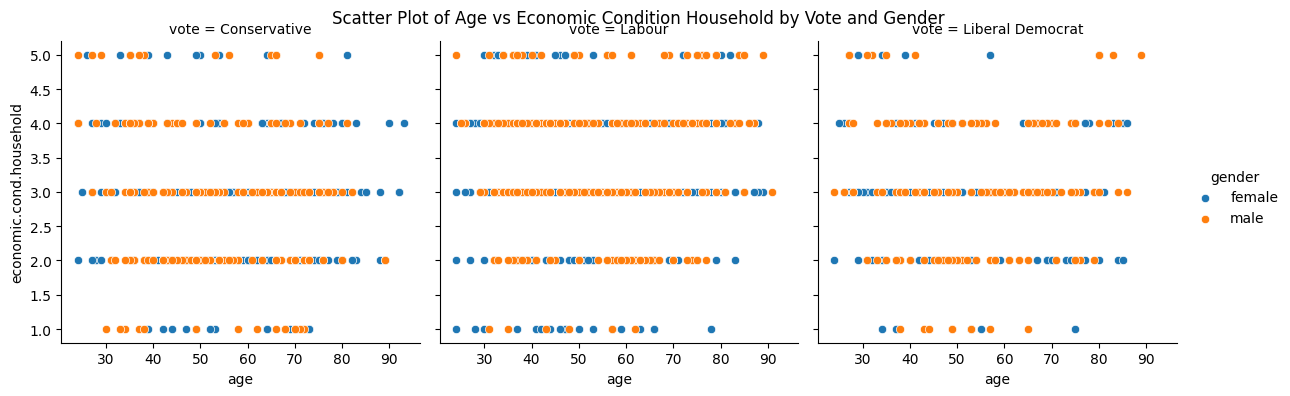

In [ ]:
# FacetGrid for multivariate analysis (scatterplot of age vs economic conditions by vote)
g = sns.FacetGrid(df, col="vote", hue="gender", height=4)
g.map(sns.scatterplot, "age", "economic.cond.household")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot of Age vs Economic Condition Household by Vote and Gender')
plt.show()


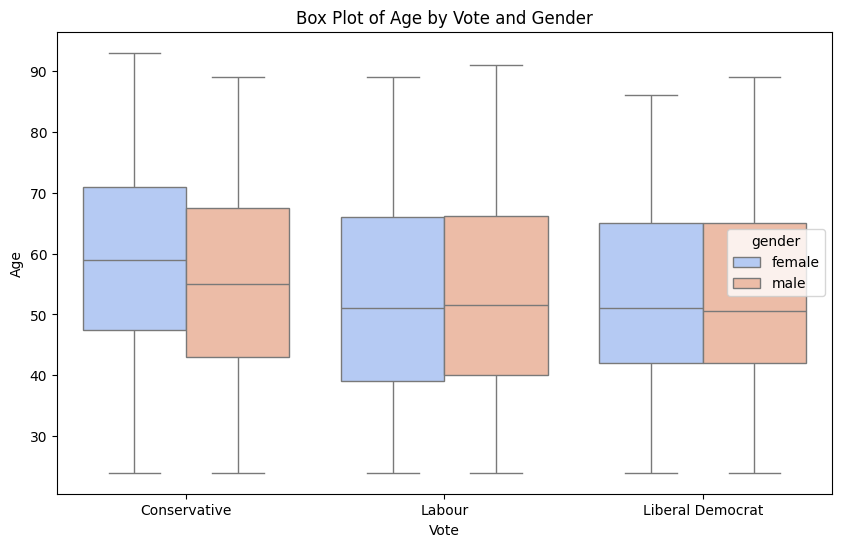

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='vote', y='age', hue='gender', data=df, palette='coolwarm')
plt.title('Box Plot of Age by Vote and Gender')
plt.xlabel('Vote')
plt.ylabel('Age')
plt.show()


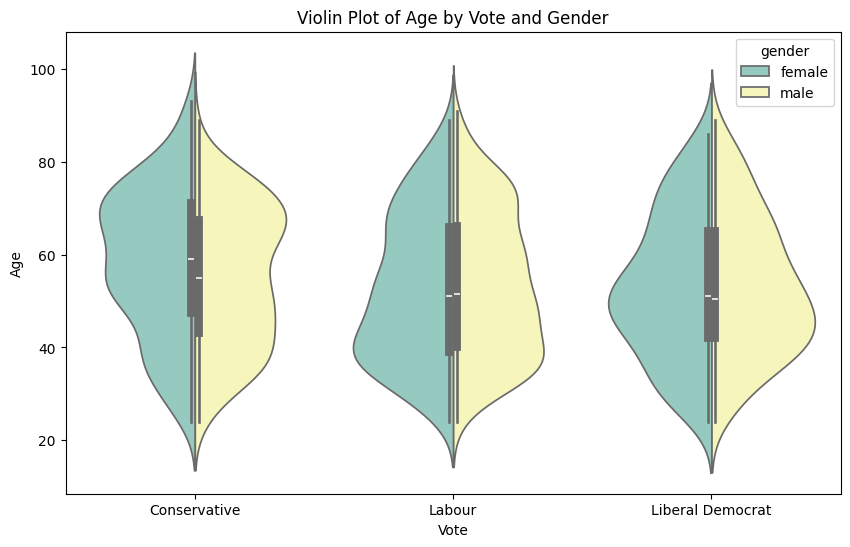

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='vote', y='age', hue='gender', data=df, split=True, palette='Set3')
plt.title('Violin Plot of Age by Vote and Gender')
plt.xlabel('Vote')
plt.ylabel('Age')
plt.show()
